<a href="https://colab.research.google.com/github/madaime2/Novel_Pollen_Phylogenetic_Placement/blob/main/Morphological_Visualizations/01_Morphological_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BEGIN HERE (NAIVE CLASSIFIER)
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision 
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])
 
torch.manual_seed(3)
data_transforms = {
    'train': transforms.Compose([
       # transforms.RandomResizedCrop(224),
         torchvision.transforms.Resize((224,224)),
 
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation((-90,90)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
       # transforms.Resize(256),
       torchvision.transforms.Resize((224,224)),
       # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'C:/Users/meada/OneDrive/Desktop/Podocarpus_Stacks_Split4/'


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=10,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Extract individual cross-sectional features while keeping MIP and Patch Features Fixed

In [ ]:
# Load naïve classifier (Cross-sectional Images) 
# ResNeXt101, pretrained on imagenet-1K dataset


# Load naïve classifier (Cross-sectional Images) 
# ResNeXt101, pretrained on imagenet-1K dataset



PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Stacks_Split4.pt"

model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30) 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);



from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)
    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir
    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    #feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats

# Validation dir

                     
val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Stacks/"


val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []

All_feats_shape = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))

    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
        All_feats_shape.append(feats.shape)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.concatenate(features, 0)
features_Stacks_Indiv = features 

(20, 2048)
(8, 2048)
(11, 2048)
(6, 2048)
(11, 2048)
(8, 2048)
(17, 2048)
(11, 2048)
(3, 2048)


In [ ]:
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Images_Split4.pt"

model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

In [ ]:
from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)

    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir

    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats
   

# Validation dir


val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Images/"


val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))
    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

features_Images_Average = features 

(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


In [ ]:
RepeatedImages = []
for i in range(len(All_feats_shape)):
    repeatedImage = torch.tensor(features_Images_Average[i]).repeat(All_feats_shape[i][0],1)
    RepeatedImages.append(repeatedImage)

In [ ]:
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Patches_Split4.pt"


model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

In [ ]:
from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)

    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir

    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats
   

# Validation dir


val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Patches/"

val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))
    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

features_Patches_Average = features 

(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


In [ ]:
RepeatedPatches = []
for i in range(len(All_feats_shape)):
    repeatedPatch = torch.tensor(features_Patches_Average[i]).repeat(All_feats_shape[i][0],1)
    RepeatedPatches.append(repeatedPatch)

### Concatenate All individual cross-sectional image features (along with the fixed MIP and patch features) 

In [ ]:
JoinedTensorImages = torch.tensor(torch.cat(RepeatedImages))
JoinedTensorPatches = torch.tensor(torch.cat(RepeatedPatches))
features_Stacks_Indiv_tensor = torch.tensor(features_Stacks_Indiv)
Concatenated_Modalities_Informative_Stacks = torch.cat((features_Stacks_Indiv_tensor,JoinedTensorImages,JoinedTensorPatches),1)

C:\Users\meada\AppData\Local\Temp/ipykernel_20584/3742222681.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  JoinedTensorImages = torch.tensor(torch.cat(RepeatedImages))
C:\Users\meada\AppData\Local\Temp/ipykernel_20584/3742222681.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  JoinedTensorPatches = torch.tensor(torch.cat(RepeatedPatches))


# Extract individual PATCH features while keeping Cross-sectional and MIP Features Fixed

In [1]:
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Patches_Split4.pt"
    
model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

In [1]:
from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)

    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir

    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    #feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats
   

# Validation dir

val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Patches/"

val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []
All_feats_shape = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))
    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
        All_feats_shape.append(feats.shape)

### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.concatenate(features, 0)

features_Patches_Indiv = features 

In [1]:
# Load naïve classifier (Cross-sectional Images) 
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Stacks_Split4.pt"


model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

In [1]:
from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)
    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir
    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats

# Validation dir


val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Stacks/"



val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []

for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))

    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)
features_Stacks_Average = features 

In [1]:
RepeatedStacks = []
for i in range(len(All_feats_shape)):
    repeatedStack = torch.tensor(features_Stacks_Average[i]).repeat(All_feats_shape[i][0],1)
    RepeatedStacks.append(repeatedStack)

In [1]:
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Images_Split4.pt"



model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

In [1]:
from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)

    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir

    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats
   

# Validation dir


val_dir =  "C:/Users/meada/OneDrive/Desktop/Podocarpites-Copy/Images/"


val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))
    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

features_Images_Average = features 

In [1]:
RepeatedImages = []
for i in range(len(All_feats_shape)):
    repeatedImage = torch.tensor(features_Images_Average[i]).repeat(All_feats_shape[i][0],1)
    RepeatedImages.append(repeatedImage)

### Concatenate All individual PATCH features (along with the fixed Cross-sectional and MIP features) 

In [1]:
JoinedTensorStacks = torch.tensor(torch.cat(RepeatedStacks))
JoinedTensorImages = torch.tensor(torch.cat(RepeatedImages))
features_Patches_Indiv_tensor = torch.tensor(features_Patches_Indiv)
Concatenated_Modalities_Informative_Patches = torch.cat((JoinedTensorStacks,JoinedTensorImages,features_Patches_Indiv_tensor),1)

In [1]:
Concatenated_Modalities_Informative_Patches.shape

# Extract Known Features

## Cross-Sectional Images

In [1]:
# Load naïve classifier (Cross-sectional Images) 
# ResNeXt101, pretrained on imagenet-1K dataset

PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Stacks_Split4.pt"

model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)
    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir
    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats

# Validation dir

val_dir = "C:/Users/meada/OneDrive/Desktop/Stacks_All_Podocarpus_All/"


val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []

All_feats_shape = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))

    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
        All_feats_shape.append(feats.shape)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

In [ ]:
# Concatenate Cross-Sectional Image Directories and FEATURES, and get sorted feature vectors
import numpy as np 
Dirs_and_Features = {}
for i in range (len(all_image_dirs)):
  array_dir = all_image_dirs[i]
  array_feature = features[i]
  Dirs_and_Features[array_dir] = array_feature
  #Dirs_and_Scores.append(Dir_and_Score)
    
Stack_Features_Sorted = []
for key in sorted(Dirs_and_Features.keys()) :
   #print(key , " :: " , Dirs_and_Scores[key])
   #Dirs_and_Scores[key]
   Stack_Features_Sorted.append(Dirs_and_Features[key])

labels.sort()
Stack_Labels = labels

## MIP

In [1]:
# ResNeXt101, pretrained on imagenet-1K dataset


PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Images_Split4.pt"



model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)
    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir
    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats

# Validation dir


val_dir = "C:/Users/meada/OneDrive/Desktop/Images_All_Podocarpus_All/"

val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []

All_feats_shape = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))

    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
        All_feats_shape.append(feats.shape)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

In [ ]:
# Concatenate Image (whole images) Directories and FEATURES, and get sorted feature vectors
import numpy as np 
Dirs_and_Features = {}
for i in range (len(all_image_dirs)):
  array_dir = all_image_dirs[i]
  array_feature = features[i]
  Dirs_and_Features[array_dir] = array_feature
  #Dirs_and_Scores.append(Dir_and_Score)

Image_Features_Sorted = []
for key in sorted(Dirs_and_Features.keys()) :
   #print(key , " :: " , Dirs_and_Scores[key])
   #Dirs_and_Scores[key]
    labels.sort()
    Image_Labels = labels
    Image_Features_Sorted.append(Dirs_and_Features[key])

labels.sort()
Image_Labels = labels

In [ ]:
labels

## Patches

In [1]:
# ResNeXt101, pretrained on imagenet-1K dataset

PATH = "C:/Users/meada/OneDrive/Desktop/Podocarpus_Patches_Split4.pt"



model =  models.resnext101_32x8d(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 30); 
model.load_state_dict(torch.load(PATH));
#model.load_state_dict(torch.load(PATH, map_location="cpu"))
model.to(device);

from torchvision.transforms.transforms import ConvertImageDtype
from torchvision.transforms.functional import convert_image_dtype
import glob
from PIL import Image

transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

def extract_features(model, image_dir, k=80):
    """
    """
    patch_paths = glob.glob(os.path.join(image_dir, '*'))

    images = []
    for path in patch_paths:
        image = Image.open(path).convert('RGB')
        image = transform(image)
        images.append(image)
    images = torch.stack(images, 0).to(device)
    feats = model(images)
    feats = feats.detach().cpu().numpy()
    patcho = image_dir
    # Take average and get final prediction
    # feats = feats.mean(0)

    ###### Add line below to group all patch features / image
    feats = np.sort(feats, 0)[::-1][:k].mean(0)
    print(feats.shape)
    return feats

# Validation dir

val_dir = "C:/Users/meada/OneDrive/Desktop/Patches_All_Podocarpus_All/"


val_class_dirs = glob.glob(os.path.join(val_dir, '*'))

# Modify output
model.fc = nn.Identity()
model.eval()

class_map = {name: idx for idx, name in enumerate(class_names)}
all_image_dirs = []
features = []
labels = []

All_feats_shape = []
for d in val_class_dirs:
    image_dirs = glob.glob(os.path.join(d, '*'))

    for image_dir in image_dirs:
        class_name = os.path.basename(image_dir).split('.')[0]
        label = class_map[class_name]
        labels.append(label)
        all_image_dirs.append(image_dir)  
        feats = extract_features(model, image_dir)
        features.append(feats)
        All_feats_shape.append(feats.shape)
### Replace by np.stack (vs concatenate) to group all patch features/image
features = np.stack(features, 0)

In [ ]:
# Concatenate Patch Directories and FEATURES, and get sorted feature vectors
import numpy as np 
Dirs_and_Features = {}
for i in range (len(all_image_dirs)):
  array_dir = all_image_dirs[i]
  array_feature = features[i]
  Dirs_and_Features[array_dir] = array_feature
  #Dirs_and_Scores.append(Dir_and_Score)
    
Patch_Features_Sorted = []
for key in sorted(Dirs_and_Features.keys()) :
   #print(key , " :: " , Dirs_and_Scores[key])
   #Dirs_and_Scores[key]
   Patch_Features_Sorted.append(Dirs_and_Features[key])

labels.sort()
Patch_Labels = label

In [ ]:
Concatenated_Features_Three_Modalities = torch.cat((torch.tensor(Stack_Features_Sorted), torch.tensor(Image_Features_Sorted), torch.tensor(Patch_Features_Sorted)), dim =1)
Concatenated_Features_Three_Modalities.shape
Concatenated_Features_Three_Modalities_Known = Concatenated_Features_Three_Modalities
Y = Image_Labels 

In [ ]:
# Podocarpites
 
Y = labels

C = np.array([
[0,99.79615,63.13772,99.79615,63.13772,99.79615,99.79615,63.13772,99.79615,30.05496,63.13772,30.05496,99.79615,99.79615,63.13772,63.13772,99.79615,30.05496,99.79615,63.13772,63.13772,63.13772,99.79615,99.79615,72.74426,63.13772,99.79615,99.79615,12.58331,63.13772],
[99.79615,0,99.79615,36.20694,99.79615,65.49675,49.15364,99.79615,65.49675,99.79615,99.79615,99.79615,49.15364,28.1985,99.79615,99.79615,42.4938,99.79615,49.15364,99.79615,99.79615,99.79615,28.1985,49.15364,99.79615,99.79615,65.49675,49.15364,99.79615,99.79615],
[63.13772,99.79615,0,99.79615,15.93869,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,33.41821,52.67842,99.79615,63.13772,99.79615,58.99733,25.55484,58.99733,99.79615,99.79615,72.74426,15.93869,99.79615,99.79615,63.13772,25.55484],
[99.79615,36.20694,99.79615,0,99.79615,65.49675,49.15363,99.79615,65.49675,99.79615,99.79615,99.79615,49.15363,36.20694,99.79615,99.79615,42.4938,99.79615,49.15363,99.79615,99.79615,99.79615,36.20694,49.15363,99.79615,99.79615,65.49675,49.15363,99.79615,99.79615],
[63.13772,99.79615,15.93869,99.79615,0,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,33.41821,52.67842,99.79615,63.13772,99.79615,58.99733,25.55484,58.99733,99.79615,99.79615,72.74426,12.69516,99.79615,99.79615,63.13772,25.55484],
[99.79615,65.49675,99.79615,65.49675,99.79615,0,65.49675,99.79615,32.59701,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,65.49675,99.79615,65.49675,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,32.59701,65.49675,99.79615,99.79615],
[99.79615,49.15364,99.79615,49.15363,99.79615,65.49675,0,99.79615,65.49675,99.79615,99.79615,99.79615,28.27449,49.15363,99.79615,99.79615,49.15364,99.79615,28.27449,99.79615,99.79615,99.79615,49.15363,10.13461,99.79615,99.79615,65.49675,28.27449,99.79615,99.79615],
[63.13772,99.79615,52.67842,99.79615,52.67842,99.79615,99.79615,0,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,52.67842,12.04249,99.79615,63.13772,99.79615,58.99733,52.67842,58.99733,99.79615,99.79615,72.74426,52.67842,99.79615,99.79615,63.13772,52.67842],
[99.79615,65.49675,99.79615,65.49675,99.79615,32.59701,65.49675,99.79615,0,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,65.49675,99.79615,65.49675,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,2.84746,65.49675,99.79615,99.79615],
[30.05496,99.79615,63.13772,99.79615,63.13772,99.79615,99.79615,63.13772,99.79615,0,63.13772,7.36035,99.79615,99.79615,63.13772,63.13772,99.79615,14.47632,99.79615,63.13772,63.13772,63.13772,99.79615,99.79615,72.74426,63.13772,99.79615,99.79615,30.05496,63.13772],
[63.13772,99.79615,58.99733,99.79615,58.99733,99.79615,99.79615,58.99733,99.79615,63.13772,0,63.13772,99.79615,99.79615,58.99733,58.99733,99.79615,63.13772,99.79615,51.13068,58.99733,23.76483,99.79615,99.79615,72.74426,58.99733,99.79615,99.79615,63.13772,58.99733],
[30.05496,99.79615,63.13772,99.79615,63.13772,99.79615,99.79615,63.13772,99.79615,7.36035,63.13772,0,99.79615,99.79615,63.13772,63.13772,99.79615,14.47632,99.79615,63.13772,63.13772,63.13772,99.79615,99.79615,72.74426,63.13772,99.79615,99.79615,30.05496,63.13772],
[99.79615,49.15364,99.79615,49.15363,99.79615,65.49675,28.27449,99.79615,65.49675,99.79615,99.79615,99.79615,0,49.15363,99.79615,99.79615,49.15364,99.79615,20.10967,99.79615,99.79615,99.79615,49.15363,28.27449,99.79615,99.79615,65.49675,7.82913,99.79615,99.79615],
[99.79615,28.1985,99.79615,36.20694,99.79615,65.49675,49.15363,99.79615,65.49675,99.79615,99.79615,99.79615,49.15363,0,99.79615,99.79615,42.4938,99.79615,49.15363,99.79615,99.79615,99.79615,5.34205,49.15363,99.79615,99.79615,65.49675,49.15363,99.79615,99.79615],
[63.13772,99.79615,33.41821,99.79615,33.41821,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,0,52.67842,99.79615,63.13772,99.79615,58.99733,33.41822,58.99733,99.79615,99.79615,72.74426,33.41821,99.79615,99.79615,63.13772,33.41821],
[63.13772,99.79615,52.67842,99.79615,52.67842,99.79615,99.79615,12.04249,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,52.67842,0,99.79615,63.13772,99.79615,58.99733,52.67842,58.99733,99.79615,99.79615,72.74426,52.67842,99.79615,99.79615,63.13772,52.67842],
[99.79615,42.4938,99.79615,42.4938,99.79615,65.49675,49.15364,99.79615,65.49675,99.79615,99.79615,99.79615,49.15364,42.4938,99.79615,99.79615,0,99.79615,49.15364,99.79615,99.79615,99.79615,42.4938,49.15364,99.79615,99.79615,65.49675,49.15364,99.79615,99.79615],
[30.05496,99.79615,63.13772,99.79615,63.13772,99.79615,99.79615,63.13772,99.79615,14.47632,63.13772,14.47632,99.79615,99.79615,63.13772,63.13772,99.79615,0,99.79615,63.13772,63.13772,63.13772,99.79615,99.79615,72.74426,63.13772,99.79615,99.79615,30.05496,63.13772],
[99.79615,49.15364,99.79615,49.15363,99.79615,65.49675,28.27449,99.79615,65.49675,99.79615,99.79615,99.79615,20.10967,49.15363,99.79615,99.79615,49.15364,99.79615,0,99.79615,99.79615,99.79615,49.15363,28.27449,99.79615,99.79615,65.49675,20.10967,99.79615,99.79615],
[63.13772,99.79615,58.99733,99.79615,58.99733,99.79615,99.79615,58.99733,99.79615,63.13772,51.13068,63.13772,99.79615,99.79615,58.99733,58.99733,99.79615,63.13772,99.79615,0,58.99733,51.13068,99.79615,99.79615,72.74426,58.99733,99.79615,99.79615,63.13772,58.99733],
[63.13772,99.79615,25.55484,99.79615,25.55484,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,33.41822,52.67842,99.79615,63.13772,99.79615,58.99733,0,58.99733,99.79615,99.79615,72.74426,25.55484,99.79615,99.79615,63.13772,22.27456],
[63.13772,99.79615,58.99733,99.79615,58.99733,99.79615,99.79615,58.99733,99.79615,63.13772,23.76483,63.13772,99.79615,99.79615,58.99733,58.99733,99.79615,63.13772,99.79615,51.13068,58.99733,0,99.79615,99.79615,72.74426,58.99733,99.79615,99.79615,63.13772,58.99733],
[99.79615,28.1985,99.79615,36.20694,99.79615,65.49675,49.15363,99.79615,65.49675,99.79615,99.79615,99.79615,49.15363,5.34205,99.79615,99.79615,42.4938,99.79615,49.15363,99.79615,99.79615,99.79615,0,49.15363,99.79615,99.79615,65.49675,49.15363,99.79615,99.79615],
[99.79615,49.15364,99.79615,49.15363,99.79615,65.49675,10.13461,99.79615,65.49675,99.79615,99.79615,99.79615,28.27449,49.15363,99.79615,99.79615,49.15364,99.79615,28.27449,99.79615,99.79615,99.79615,49.15363,0,99.79615,99.79615,65.49675,28.27449,99.79615,99.79615],
[72.74426,99.79615,72.74426,99.79615,72.74426,99.79615,99.79615,72.74426,99.79615,72.74426,72.74426,72.74426,99.79615,99.79615,72.74426,72.74426,99.79615,72.74426,99.79615,72.74426,72.74426,72.74426,99.79615,99.79615,0,72.74426,99.79615,99.79615,72.74426,72.74426],
[63.13772,99.79615,15.93869,99.79615,12.69516,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,33.41821,52.67842,99.79615,63.13772,99.79615,58.99733,25.55484,58.99733,99.79615,99.79615,72.74426,0,99.79615,99.79615,63.13772,25.55484],
[99.79615,65.49675,99.79615,65.49675,99.79615,32.59701,65.49675,99.79615,2.84746,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,65.49675,99.79615,65.49675,99.79615,99.79615,99.79615,65.49675,65.49675,99.79615,99.79615,0,65.49675,99.79615,99.79615],
[99.79615,49.15364,99.79615,49.15363,99.79615,65.49675,28.27449,99.79615,65.49675,99.79615,99.79615,99.79615,7.82913,49.15363,99.79615,99.79615,49.15364,99.79615,20.10967,99.79615,99.79615,99.79615,49.15363,28.27449,99.79615,99.79615,65.49675,0,99.79615,99.79615],
[12.58331,99.79615,63.13772,99.79615,63.13772,99.79615,99.79615,63.13772,99.79615,30.05496,63.13772,30.05496,99.79615,99.79615,63.13772,63.13772,99.79615,30.05496,99.79615,63.13772,63.13772,63.13772,99.79615,99.79615,72.74426,63.13772,99.79615,99.79615,0,63.13772],
[63.13772,99.79615,25.55484,99.79615,25.55484,99.79615,99.79615,52.67842,99.79615,63.13772,58.99733,63.13772,99.79615,99.79615,33.41821,52.67842,99.79615,63.13772,99.79615,58.99733,22.27456,58.99733,99.79615,99.79615,72.74426,25.55484,99.79615,99.79615,63.13772,0]
])


C = C/C.max()
C = torch.from_numpy(C)




import torch 


Genera = ["$\it{P. acutifolius}$","$\it{P. archboldii}$","$\it{P. brasiliensis}$","$\it{P. brassii}$","$\it{P. coriaceus}$","$\it{P. drouynianus}$","$\it{P. elatus}$","$\it{P. elongatus}$","$\it{P. glaucus}$","$\it{P. gnidiodes}$","$\it{P. lambertii}$","$\it{P. lawrencei}$","$\it{P. lucienii}$","$\it{P. macrophyllus}$","$\it{P. matudae}$","$\it{P. milanjianus}$","$\it{P. neriifolius}$","$\it{P. nivalis}$","$\it{P. novae-caledoniae}$","$\it{P. nubigenus}$","$\it{P. oleifolius}$","$\it{P. parlatorei}$","$\it{P. pilgeri}$","$\it{P. polystachyus}$","$\it{P. salignus}$","$\it{P. sellowii}$","$\it{P. spinulosus}$","$\it{P. sylvestris}$","$\it{P. totara}$","$\it{P. urbanii}$"];


GenusList = []
for i in range(len(Y)):
 GenusNumber = Y[i]
 GenusName = Genera[GenusNumber]
 GenusList.append(GenusName)

import torch
import pandas as pd

X_train = torch.tensor(Concatenated_Features_Three_Modalities_Known)
print(X_train.shape)

Y_tens = torch.tensor(Y)
C.shape


torch.Size([309, 6144])


C:\Users\meada\AppData\Local\Temp/ipykernel_20584/2310276081.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(Concatenated_Features_Three_Modalities_Known)


torch.Size([30, 30])

In [ ]:
# Get image-wise distance matrix from class-wise distance matrix

repeated_rows = []

for i in range(len(C)):
  a = torch.Tensor(C[i].float())
  a_repeat = a.repeat(torch.bincount(Y_tens).numpy()[i],1)
  repeated_rows.append(a_repeat)
  repeated_rows
  repeated_rows_cat = torch.cat(repeated_rows,0)
  repeated_rows_cat_transpose = torch.transpose(repeated_rows_cat,0,1)
  repeated_rows_transpose = []
  
  for j in range(len(repeated_rows_cat_transpose)):
    b = torch.Tensor(repeated_rows_cat_transpose[j])
    b_repeat = b.repeat(torch.bincount(Y_tens).numpy()[j],1)
    repeated_rows_transpose.append(b_repeat)
    
    Image_wise_matrix = torch.cat(repeated_rows_transpose)
Image_wise_matrix.shape

torch.Size([309, 309])

In [ ]:
x = torch.tensor(X_train)
y = Image_wise_matrix
#labels = np.array(y)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
labels = y;
labels.to(device);

C:\Users\meada\AppData\Local\Temp/ipykernel_20584/3840597558.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(X_train)


In [ ]:
# Cosine Distance-Based Loss Function 

def sim_matrix(a, b, eps=1e-8):
    """
    added eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    #sim_mt = a_norm@b_norm.T 
    return sim_mt

def compute_loss_cosine(output, label = Image_wise_matrix):
    distance_mat = 1 - sim_matrix(output, output, eps = 1e-8)
    #distance_mat = distance_mat/distance_mat.max()
    return torch.sum(torch.pow(Image_wise_matrix-distance_mat, 2))
    #return torch.sum(torch.abs(Image_wise_matrix - distance_mat))

In [ ]:
# Get training data 

train_data = []
for i in range(len(x)):
   train_data.append([x[i], labels[i]])
trainloader = torch.utils.data.DataLoader(train_data, shuffle=False, batch_size=len(y))
i1, l1 = next(iter(trainloader))
print(i1.shape)

torch.Size([309, 6144])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import math
import torch
import torch.nn as nn
from torch.autograd import Variable

# define the NN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6144 , 1024)

        # Add 

        #self.a = torch.nn.parameter.Parameter(torch.tensor([1.], requires_grad = False))
        #self.b = torch.nn.parameter.Parameter(torch.tensor([1.], requires_grad = False))
        #self.c = torch.nn.parameter.Parameter(torch.tensor([1.], requires_grad = False))

        self.a = nn.Parameter(torch.ones(1))
        self.b = nn.Parameter(torch.ones(1))
        self.c = nn.Parameter(torch.ones(1))

        #torch.nn.Parameter(torch.tensor([1.], requires_grad = False))

        # End 

        #self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024 , 512)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512 , 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(256 , 256)
        
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 6144)

        aa = F.sigmoid(self.a)
        bb = F.sigmoid(self.b)
        cc = F.sigmoid(self.c)

        aa,bb,cc = aa/(aa+bb+cc),bb/(aa+bb+cc),cc/(aa+bb+cc)

        #print("test place 1")
        # Adding a "weight" to each of the three modalities 
        # Allows us to look at their individual contributions during training. 
        
        x1 = aa*x[:, 0:2048]
        x2 = bb*x[:, 2048:4096]
        x3 = cc*x[:, 4096:6144]
        xx = torch.cat([x1,x2,x3],1)
        #print("test place 2")
        x = F.relu(self.fc1(xx))  
        #x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.relu(self.fc4(x))
        return x

In [ ]:
labels.to(device);
X_train = X_train.to(device);
x = x.to(device);
y = y.to(device);
Image_wise_matrix = Image_wise_matrix.to(device)

In [ ]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

#Image_wise_matrix = Image_wise_matrix.to(device)
mlp = Net()
best_model = copy.deepcopy(mlp)
best_loss= 9999
#criterion = MarcLoss(C, lambd)
criterion = compute_loss_cosine
#optimizer = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.5)
optimizer = optim.Adam(mlp.parameters(), lr=0.0001, weight_decay=1e-4)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
X_train.requires_grad = False
mlp.to(device)
mlp.train()
loss = 99999

import random

manualSeed = 10
np.random.seed(manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.cuda.manual_seed(manualSeed)
torch.cuda.manual_seed_all(manualSeed)
torch.backends.cudnn.enabled = False 
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

for epoch in range(10000): 
    optimizer.zero_grad()
    output = mlp(X_train.float()).to(device)
    label= C.to(device)
    loss = criterion(output,label)
    if loss.item()<best_loss:
        best_model = copy.deepcopy(mlp)
        best_loss = loss.item()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:           
      #mlp.eval()     
      print("loss at epoch %s: %f "% (epoch, loss.item()))
print('Finished Training')

loss at epoch 0: 11515.496094 
loss at epoch 20: 8704.860352 
loss at epoch 40: 8539.961914 
loss at epoch 60: 8260.587891 
loss at epoch 80: 6355.276855 
loss at epoch 100: 3898.250000 
loss at epoch 120: 3129.073975 
loss at epoch 140: 2830.652100 
loss at epoch 160: 2702.809570 
loss at epoch 180: 2634.362305 
loss at epoch 200: 2511.821289 
loss at epoch 220: 2491.594482 
loss at epoch 240: 2433.482666 
loss at epoch 260: 2356.983887 
loss at epoch 280: 2232.367188 
loss at epoch 300: 2154.841064 
loss at epoch 320: 1846.732666 
loss at epoch 340: 1572.897217 
loss at epoch 360: 1329.802856 
loss at epoch 380: 1129.539673 
loss at epoch 400: 959.626343 
loss at epoch 420: 871.403564 
loss at epoch 440: 824.295044 
loss at epoch 460: 772.450928 
loss at epoch 480: 715.871338 
loss at epoch 500: 689.076294 
loss at epoch 520: 604.782471 
loss at epoch 540: 528.916321 
loss at epoch 560: 498.471863 
loss at epoch 580: 458.401917 
loss at epoch 600: 435.871704 
loss at epoch 620: 411.2

In [ ]:
aa = F.sigmoid(mlp.a)
bb = F.sigmoid(mlp.b)
cc = F.sigmoid(mlp.c)
aa,bb,cc = aa/(aa+bb+cc),bb/(aa+bb+cc),cc/(aa+bb+cc)
print(aa)
print(bb)
print(cc)

tensor([0.3413], device='cuda:0', grad_fn=<DivBackward0>)
tensor([0.3308], device='cuda:0', grad_fn=<DivBackward0>)
tensor([0.3279], device='cuda:0', grad_fn=<DivBackward0>)


torch.Size([309, 6144])

In [ ]:
# Load Podocarpites Model

PATH = "/Users/meada/OneDrive/Desktop/Informative_CSI_Patches/MLP_PODOCARPITES_reconstructed.pt"
model = torch.load(PATH)
model.eval()

model

Net(
  (fc1): Linear(in_features=6144, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
)

torch.Size([42, 6144])


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [67.5, 67.5, 85.0, 85.0],
  [35.625, 35.625, 76.25, 76.25],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [107.5, 107.5, 130.0, 130.0],
  [55.9375, 55.9375, 118.75, 118.75],
  [145.0, 145.0, 155.0, 155.0],
  [150.0, 150.0, 165.0, 165.0],
  [87.34375, 87.34375, 157.5, 157.5],
  [122.421875, 122.421875, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [230.0, 230.0, 245.0, 245.0],
  [237.5, 237.5, 255.0, 255.0],
  [210.0, 210.0, 246.25, 246.25],
  [190.0, 190.0, 228.125, 228.125],
  [265.0, 265.0, 275.0, 275.0],
  [209.0625, 209.0625, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [310.0, 310.0, 325.0, 325.0],
  [317.5, 317.5, 335.0, 335.0],
  [345.0, 345.0, 355.0, 

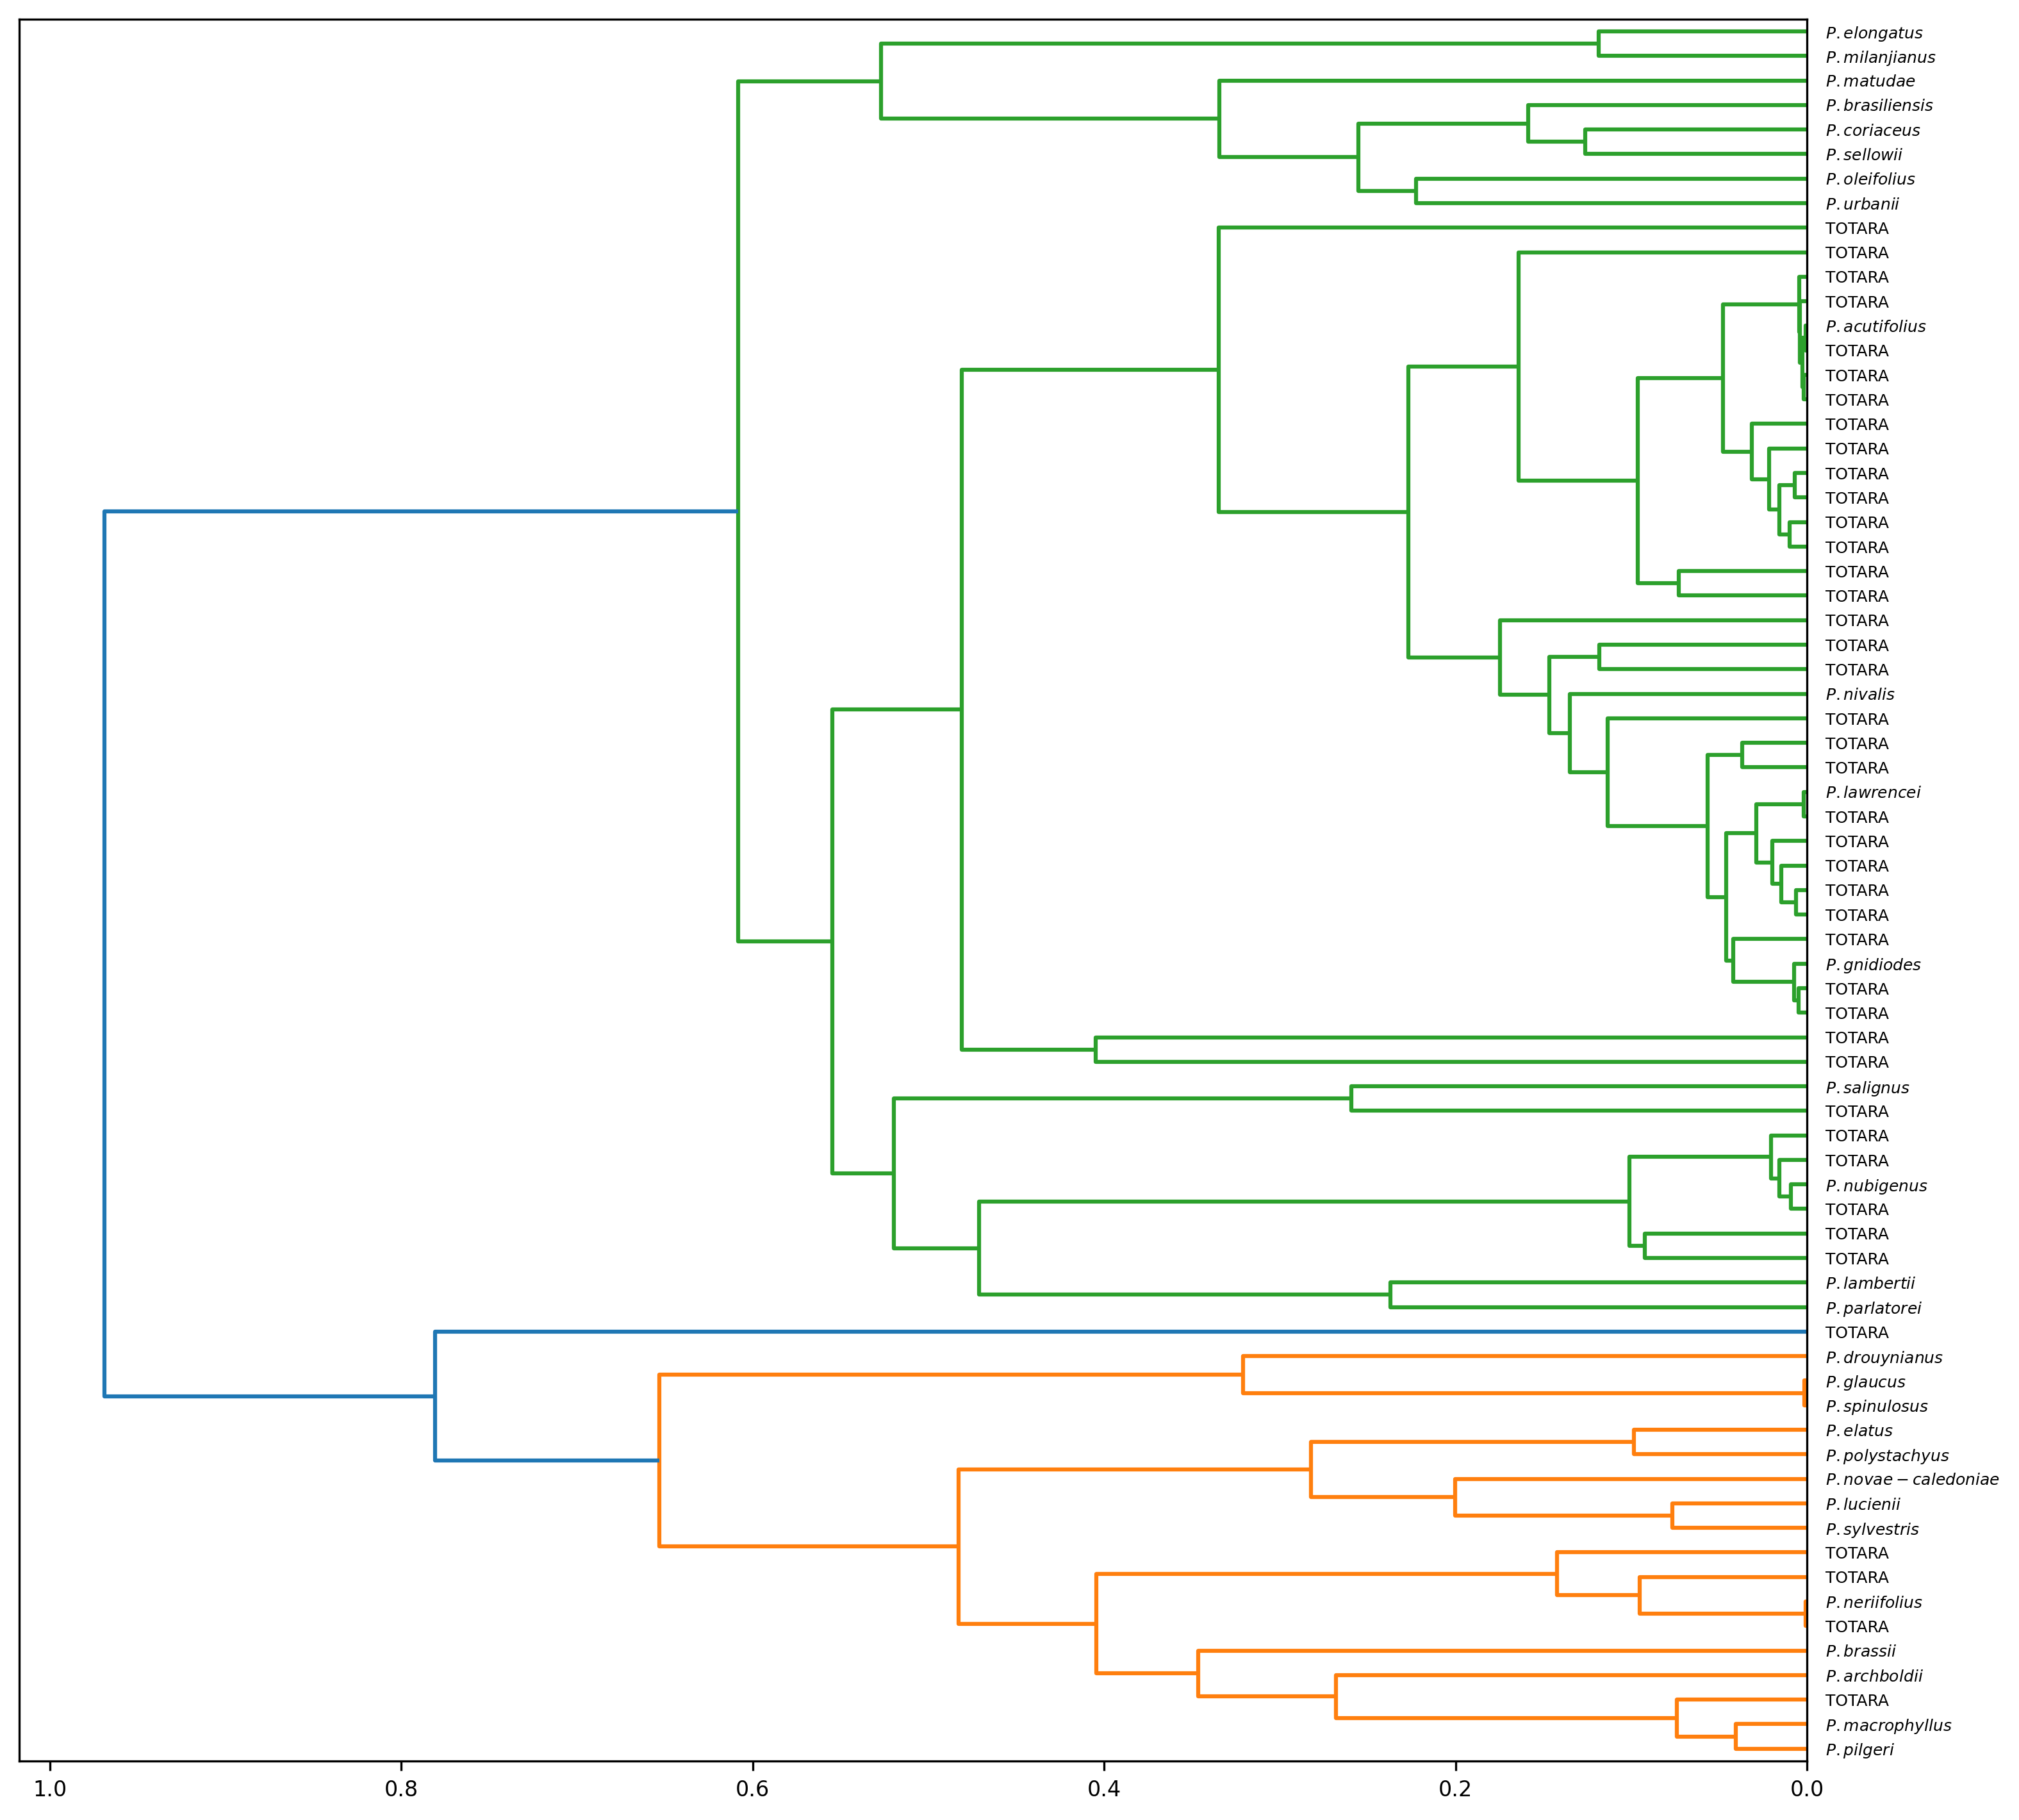

In [ ]:
import torch
import pandas as pd

X_train_pseudonovel = Concatenated_Modalities_Informative_Stacks

X_train_novel= X_train_pseudonovel

print(X_train_pseudonovel.shape)
Genus_List_With_Pseudonovel = GenusList + ["TOTARA",]*42

len(Genus_List_With_Pseudonovel)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_novel = X_train_novel.to(device)

output = mlp(X_train.float())
#output_novel = mlp(X_train_novel.reshape(X_train_novel.shape[0],1,X_train_novel.shape[1]).float())

output_novel = mlp(X_train_novel.to(device))


output_novel.shape
Dataset_With_Known_And_Novel = torch.vstack((output, output_novel))
Dataset_With_Known_And_Novel.shape

# k + n scheme

Species_Index = Y;
NumericSpeciesIndex = pd.to_numeric(Species_Index);
Indices_and_Features = np.column_stack((NumericSpeciesIndex, output.cpu().detach().numpy()));
df = pd.DataFrame(data=Indices_and_Features)
Per_Species_Transformed_Features = df.groupby([0,]).mean()
Per_Species_Transformed_Features;

NumericSpeciesIndexNovel  = ["TOTARA",]*42


Indices_and_Features_Novel = np.column_stack((NumericSpeciesIndexNovel, output_novel.cpu().detach().numpy()));
df_novel = pd.DataFrame(data= Indices_and_Features_Novel)
df_novel.groupby(by=0,axis = 0)

df_known_averaged_and_Novel = pd.concat([Per_Species_Transformed_Features,df_novel])
df_known_averaged_and_Novel  = df_known_averaged_and_Novel.iloc[: , 1:]

# Average linkage to obtain cladogram (ground-truth phylogenetic tree) from the original distance matrix. 
import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

#df_known_averaged_and_Novel_norm = (df_known_averaged_and_Novel-df_known_averaged_and_Novel.min())/(df_known_averaged_and_Novel.max()-df_known_averaged_and_Novel.min())

linked = linkage(df_known_averaged_and_Novel, "average", metric = "cosine")


Genera = ["$\it{P. acutifolius}$","$\it{P. archboldii}$","$\it{P. brasiliensis}$","$\it{P. brassii}$","$\it{P. coriaceus}$","$\it{P. drouynianus}$","$\it{P. elatus}$","$\it{P. elongatus}$","$\it{P. glaucus}$","$\it{P. gnidiodes}$","$\it{P. lambertii}$","$\it{P. lawrencei}$","$\it{P. lucienii}$","$\it{P. macrophyllus}$","$\it{P. matudae}$","$\it{P. milanjianus}$","$\it{P. neriifolius}$","$\it{P. nivalis}$","$\it{P. novae-caledoniae}$","$\it{P. nubigenus}$","$\it{P. oleifolius}$","$\it{P. parlatorei}$","$\it{P. pilgeri}$","$\it{P. polystachyus}$","$\it{P. salignus}$","$\it{P. sellowii}$","$\it{P. spinulosus}$","$\it{P. sylvestris}$","$\it{P. totara}$","$\it{P. urbanii}$"];

Genera.remove("$\it{P. totara}$")

Genera_with_novel = Genera + ["TOTARA",]*42

labelList = Genera_with_novel
plt.figure(figsize=(12,12), dpi = 300)
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


In [ ]:
aa = np.array(df_known_averaged_and_Novel)
aaa = aa.astype(float)
aaa = torch.tensor(aaa)
aaa_dist = 1-sim_matrix(aaa,aaa)
np.savetxt("PerStack_distance_TOTARA_3.0_corrected.csv", aaa_dist, delimiter=",")

In [ ]:
Concatenated_Modalities_Informative_Stacks.shape

torch.Size([42, 6144])

In [ ]:
Concatenated_Modalities_Informative_Patches.shape

torch.Size([40, 6144])

torch.Size([40, 6144])


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [10.0, 10.0, 37.5, 37.5],
  [23.75, 23.75, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [39.375, 39.375, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [130.0, 130.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [137.5, 137.5, 160.0, 160.0],
  [148.75, 148.75, 175.0, 175.0],
  [110.0, 110.0, 161.875, 161.875],
  [90.0, 90.0, 135.9375, 135.9375],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [197.5, 197.5, 215.0, 215.0],
  [206.25, 206.25, 225.0, 225.0],
  [215.625, 215.625, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [250.0, 250.0, 265.0, 265.0],
  [225.3125, 225.3125, 257.5, 257.5],
  [241.40625, 241.40625, 275.0, 275.0],
  [258.203125, 258.203125, 285.0, 285.0],
  [271.6015625, 271.6015625, 295.0, 295.0],
  [283.30078125, 283.30078125, 305.0, 305.0],
  [294.150390625, 294.150390625, 315.0, 315.0],
  [325.0

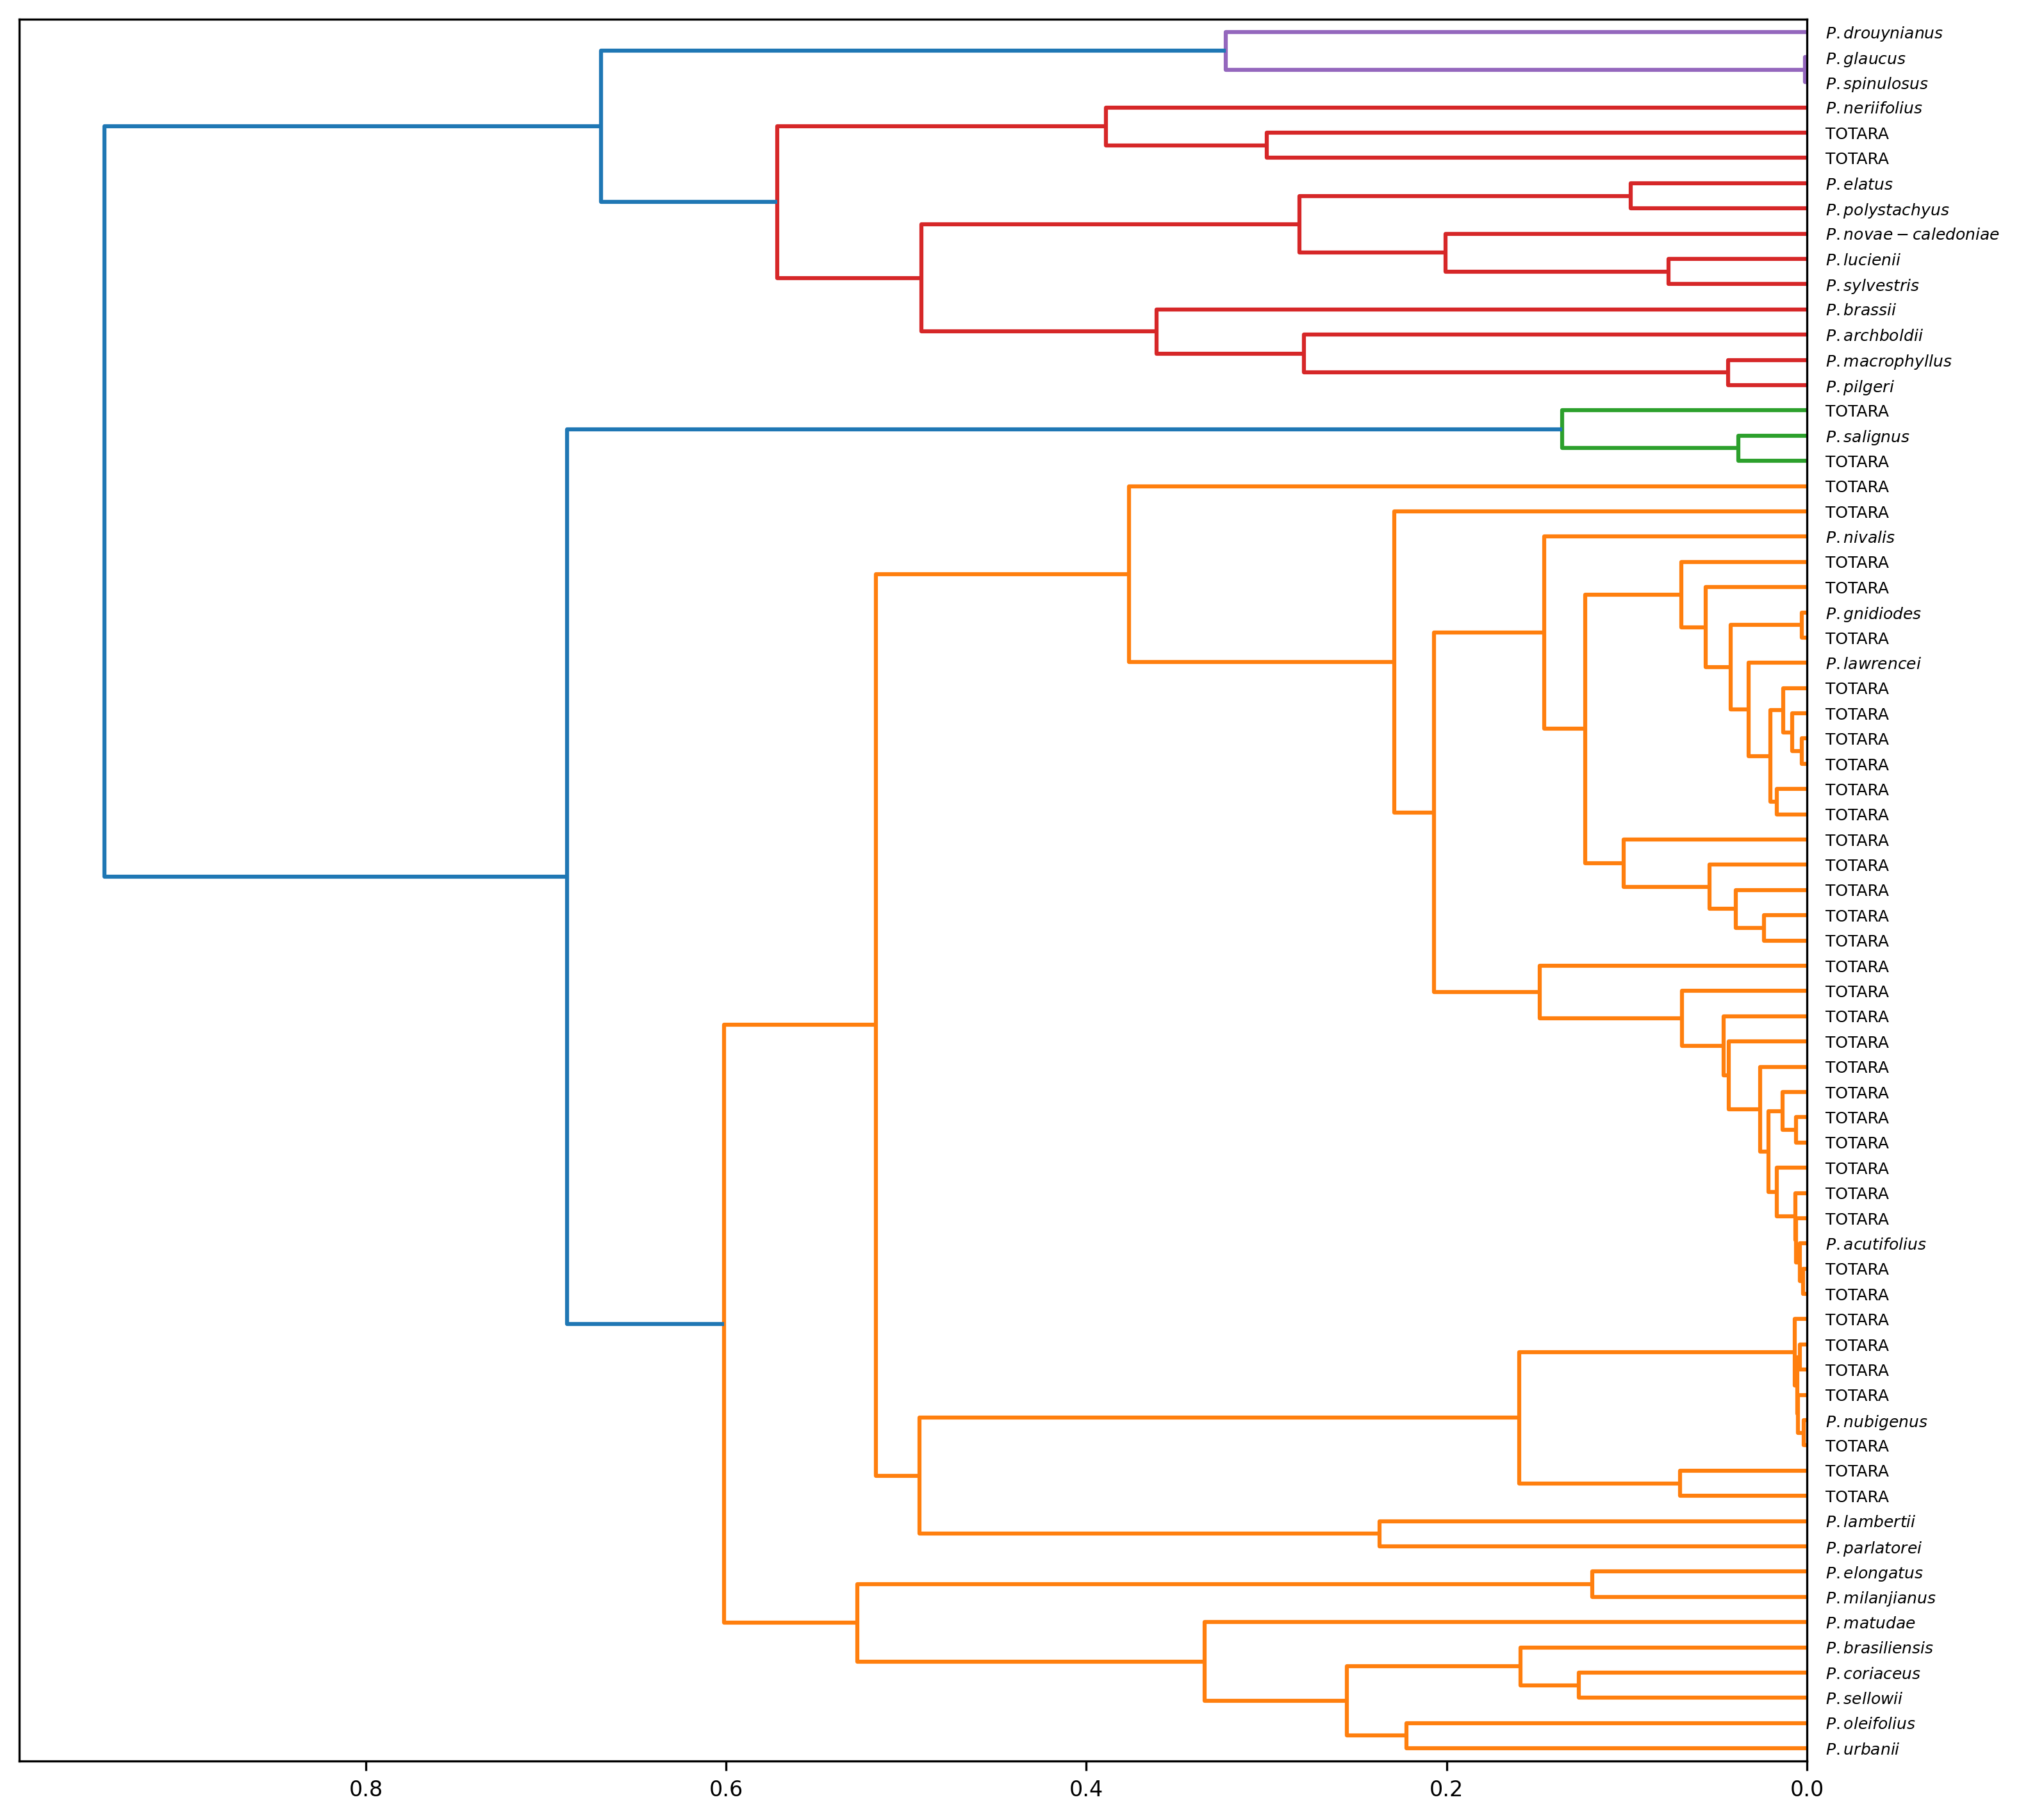

In [ ]:
import torch
import pandas as pd

X_train_pseudonovel = Concatenated_Modalities_Informative_Patches

X_train_novel= X_train_pseudonovel

print(X_train_pseudonovel.shape)
Genus_List_With_Pseudonovel = GenusList + ["TOTARA",]*40

len(Genus_List_With_Pseudonovel)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_novel = X_train_novel.to(device)

output = mlp(X_train.float())
#output_novel = mlp(X_train_novel.reshape(X_train_novel.shape[0],1,X_train_novel.shape[1]).float())

output_novel = mlp(X_train_novel.to(device))


output_novel.shape
Dataset_With_Known_And_Novel = torch.vstack((output, output_novel))
Dataset_With_Known_And_Novel.shape

# k + n scheme

Species_Index = Y;
NumericSpeciesIndex = pd.to_numeric(Species_Index);
Indices_and_Features = np.column_stack((NumericSpeciesIndex, output.cpu().detach().numpy()));
df = pd.DataFrame(data=Indices_and_Features)
Per_Species_Transformed_Features = df.groupby([0,]).mean()
Per_Species_Transformed_Features;

NumericSpeciesIndexNovel  = ["TOTARA",]*40


Indices_and_Features_Novel = np.column_stack((NumericSpeciesIndexNovel, output_novel.cpu().detach().numpy()));
df_novel = pd.DataFrame(data= Indices_and_Features_Novel)
df_novel.groupby(by=0,axis = 0)

df_known_averaged_and_Novel = pd.concat([Per_Species_Transformed_Features,df_novel])
df_known_averaged_and_Novel  = df_known_averaged_and_Novel.iloc[: , 1:]

# Average linkage to obtain cladogram (ground-truth phylogenetic tree) from the original distance matrix. 
import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

#df_known_averaged_and_Novel_norm = (df_known_averaged_and_Novel-df_known_averaged_and_Novel.min())/(df_known_averaged_and_Novel.max()-df_known_averaged_and_Novel.min())

linked = linkage(df_known_averaged_and_Novel, "average", metric = "cosine")


Genera = ["$\it{P. acutifolius}$","$\it{P. archboldii}$","$\it{P. brasiliensis}$","$\it{P. brassii}$","$\it{P. coriaceus}$","$\it{P. drouynianus}$","$\it{P. elatus}$","$\it{P. elongatus}$","$\it{P. glaucus}$","$\it{P. gnidiodes}$","$\it{P. lambertii}$","$\it{P. lawrencei}$","$\it{P. lucienii}$","$\it{P. macrophyllus}$","$\it{P. matudae}$","$\it{P. milanjianus}$","$\it{P. neriifolius}$","$\it{P. nivalis}$","$\it{P. novae-caledoniae}$","$\it{P. nubigenus}$","$\it{P. oleifolius}$","$\it{P. parlatorei}$","$\it{P. pilgeri}$","$\it{P. polystachyus}$","$\it{P. salignus}$","$\it{P. sellowii}$","$\it{P. spinulosus}$","$\it{P. sylvestris}$","$\it{P. totara}$","$\it{P. urbanii}$"];

Genera.remove("$\it{P. totara}$")

Genera_with_novel = Genera + ["TOTARA",]*40

labelList = Genera_with_novel
plt.figure(figsize=(12,12), dpi = 300)
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


In [ ]:
aa = np.array(df_known_averaged_and_Novel)
aaa = aa.astype(float)
aaa = torch.tensor(aaa)
aaa_dist = 1-sim_matrix(aaa,aaa)
np.savetxt("PerPatch_distance_Totara_3.0_corrected.csv", aaa_dist, delimiter=",")